In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

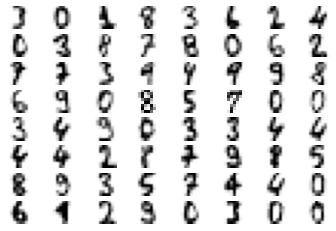

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = X[digits_indexes].shape[0]
x_inputs =[tuple(c) for c in X[digits_indexes].tolist()]
x_outputs = [tuple(c) for c in y[digits_indexes].reshape(samplesize,1).tolist()]

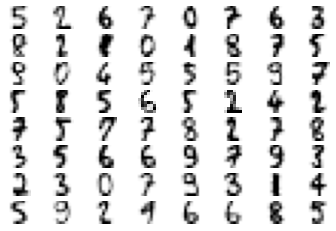

In [6]:
from random import randint
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(np.array(x_inputs[randint(0, samplesize)]).reshape(8,8), cmap='Greys')
plt.show()

In [7]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        outputs = []
        for xi in x_inputs:
            output = net.activate(xi)
            outputs.append(output)
        
        
        px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
        # the index of maximum in each line
        pred_outputs = np.argmax(px_outputs, axis = 1)
        # replace index to real number, from higher number to lower number!!
        for i in range(number_of_classification):
            index = number_of_classification - i - 1
            pred_outputs[pred_outputs==index] = numbers[index]
        
        real_outputs = np.array(x_outputs).reshape(samplesize,)
        
        acc = np.sum(pred_outputs == real_outputs)/samplesize

        genome.fitness = acc

def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # add a stdout reporter to show progress in the terminal
    reporter = neat.StdOutReporter(False)
    p.add_reporter(reporter)
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    #checkpointer = neat.Checkpointer(100)
    #p.add_reporter(checkpointer)
    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 3000)

    return [stats, winner]


samplesize = len(x_outputs)

local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist10")
[stats, winner] = run(config_path)

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)


 ****** Running generation 0 ****** 

Population's average fitness: 0.10035 stdev: 0.03869
Best fitness: 0.24304 - size: (10, 64) - species 3 - id 97
Average adjusted fitness: 0.096
Mean genetic distance 2.837, standard deviation 0.302
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 44.981 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.11288 stdev: 0.03631
Best fitness: 0.24304 - size: (10, 64) - species 5 - id 97
Average adjusted fitness: 0.072
Mean genetic distance 2.924, standard deviation 0.341
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 46.623 sec (45.802 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.12260 stdev: 0.03994
Best fitness: 0.24304 - size: (10, 64) - species 41 - id 97
Average adjusted fitness: 0.099
Mean genetic distance 2.959, standard deviation 0.351
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 47.187 sec (46.

Population's average fitness: 0.17339 stdev: 0.05867
Best fitness: 0.34323 - size: (13, 68) - species 22 - id 3218
Average adjusted fitness: 0.146
Mean genetic distance 3.198, standard deviation 0.425
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 56.238 sec (53.527 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.17364 stdev: 0.05925
Best fitness: 0.34323 - size: (13, 68) - species 22 - id 3218
Average adjusted fitness: 0.125
Mean genetic distance 3.185, standard deviation 0.443
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 54.251 sec (54.105 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.17491 stdev: 0.06012
Best fitness: 0.34323 - size: (13, 68) - species 22 - id 3218
Average adjusted fitness: 0.121
Mean genetic distance 3.196, standard deviation 0.444
Population of 195 members in 24 species
Total extinctions: 0
Generation time: 54.605 sec (54.706 average)

Population's average fitness: 0.18306 stdev: 0.06233
Best fitness: 0.34323 - size: (13, 68) - species 22 - id 3218
Average adjusted fitness: 0.131
Mean genetic distance 3.238, standard deviation 0.558
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 59.436 sec (57.427 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.18427 stdev: 0.06121
Best fitness: 0.34323 - size: (13, 68) - species 22 - id 3218
Average adjusted fitness: 0.132
Mean genetic distance 3.231, standard deviation 0.542
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 59.474 sec (57.629 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.17982 stdev: 0.06340
Best fitness: 0.34323 - size: (13, 68) - species 22 - id 3218
Average adjusted fitness: 0.141
Mean genetic distance 3.237, standard deviation 0.559
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 57.422 sec (57.791 average)

Population's average fitness: 0.17777 stdev: 0.06013
Best fitness: 0.35250 - size: (24, 84) - species 47 - id 11124
Average adjusted fitness: 0.157
Mean genetic distance 3.012, standard deviation 0.562
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 53.835 sec (52.560 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.19080 stdev: 0.05823
Best fitness: 0.35250 - size: (24, 84) - species 47 - id 11124
Average adjusted fitness: 0.127
Mean genetic distance 2.995, standard deviation 0.601
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 54.246 sec (52.852 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.18124 stdev: 0.06113
Best fitness: 0.35250 - size: (24, 84) - species 47 - id 11124
Average adjusted fitness: 0.104
Mean genetic distance 2.988, standard deviation 0.617
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 54.558 sec (53.011 avera

Population's average fitness: 0.19145 stdev: 0.05835
Best fitness: 0.36735 - size: (18, 69) - species 43 - id 14266
Average adjusted fitness: 0.096
Mean genetic distance 3.026, standard deviation 0.665
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 68.965 sec (68.254 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.19331 stdev: 0.06070
Best fitness: 0.36735 - size: (18, 69) - species 43 - id 14266
Average adjusted fitness: 0.132
Mean genetic distance 3.031, standard deviation 0.631
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 69.474 sec (68.523 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.19124 stdev: 0.05815
Best fitness: 0.36735 - size: (18, 69) - species 43 - id 14266
Average adjusted fitness: 0.137
Mean genetic distance 3.028, standard deviation 0.641
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 68.977 sec (68.713 avera

Population's average fitness: 0.20081 stdev: 0.06050
Best fitness: 0.36735 - size: (18, 69) - species 43 - id 14266
Average adjusted fitness: 0.131
Mean genetic distance 2.930, standard deviation 0.672
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 70.017 sec (71.832 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.19086 stdev: 0.06369
Best fitness: 0.36735 - size: (18, 69) - species 43 - id 14266
Average adjusted fitness: 0.137
Mean genetic distance 2.917, standard deviation 0.667
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 71.652 sec (71.860 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.19155 stdev: 0.06381
Best fitness: 0.36735 - size: (18, 69) - species 43 - id 14266
Average adjusted fitness: 0.131
Mean genetic distance 2.803, standard deviation 0.635
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 70.412 sec (71.893 averag

Population's average fitness: 0.18926 stdev: 0.06374
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.120
Mean genetic distance 2.605, standard deviation 0.498
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 70.662 sec (70.641 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.19674 stdev: 0.06255
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.171
Mean genetic distance 2.603, standard deviation 0.504
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 71.382 sec (70.727 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.19870 stdev: 0.06321
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.138
Mean genetic distance 2.635, standard deviation 0.494
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 73.180 sec (70.810 averag

Population's average fitness: 0.19829 stdev: 0.06353
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.139
Mean genetic distance 2.648, standard deviation 0.435
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 77.189 sec (75.695 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.19147 stdev: 0.06319
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.141
Mean genetic distance 2.682, standard deviation 0.414
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 79.557 sec (76.436 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.19639 stdev: 0.06375
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.133
Mean genetic distance 2.680, standard deviation 0.393
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 76.743 sec (76.784 ave

Population's average fitness: 0.20148 stdev: 0.06288
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.153
Mean genetic distance 2.717, standard deviation 0.494
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 75.126 sec (75.439 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.20621 stdev: 0.06336
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.145
Mean genetic distance 2.739, standard deviation 0.488
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 72.783 sec (75.037 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.20000 stdev: 0.06248
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.127
Mean genetic distance 2.739, standard deviation 0.472
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 74.238 sec (74.720 ave

Population's average fitness: 0.20266 stdev: 0.05754
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.140
Mean genetic distance 2.610, standard deviation 0.486
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 71.325 sec (69.370 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.20677 stdev: 0.05927
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.119
Mean genetic distance 2.617, standard deviation 0.469
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 71.253 sec (69.386 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.20235 stdev: 0.05751
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.143
Mean genetic distance 2.618, standard deviation 0.480
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 71.812 sec (69.687 averag

Population's average fitness: 0.20235 stdev: 0.06905
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.157
Mean genetic distance 2.778, standard deviation 0.446
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 71.506 sec (71.072 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.20644 stdev: 0.06796
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.123
Mean genetic distance 2.769, standard deviation 0.464
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 71.250 sec (71.241 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.20928 stdev: 0.06736
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.159
Mean genetic distance 2.804, standard deviation 0.456
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 69.362 sec (71.045 ave

Population's average fitness: 0.21028 stdev: 0.07069
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.187
Mean genetic distance 2.732, standard deviation 0.450
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 67.603 sec (68.730 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.21892 stdev: 0.06435
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.158
Mean genetic distance 2.723, standard deviation 0.480
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 67.340 sec (68.553 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.20655 stdev: 0.06463
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.115
Mean genetic distance 2.734, standard deviation 0.473
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 64.166 sec (67.960 avera

Population's average fitness: 0.20651 stdev: 0.06727
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.159
Mean genetic distance 2.727, standard deviation 0.529
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 71.863 sec (68.860 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.19944 stdev: 0.06709
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.157
Mean genetic distance 2.746, standard deviation 0.532
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 70.555 sec (70.055 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.20284 stdev: 0.06624
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.125
Mean genetic distance 2.734, standard deviation 0.514
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 68.468 sec (70.776 averag

Population's average fitness: 0.20323 stdev: 0.06723
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.151
Mean genetic distance 2.621, standard deviation 0.487
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 66.256 sec (68.255 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.20831 stdev: 0.06378
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.125
Mean genetic distance 2.644, standard deviation 0.497
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 62.861 sec (67.668 average)

 ****** Running generation 314 ****** 

Population's average fitness: 0.20441 stdev: 0.06921
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.157
Mean genetic distance 2.675, standard deviation 0.461
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 64.765 sec (67.430 averag

Population's average fitness: 0.19797 stdev: 0.06373
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.112
Mean genetic distance 2.662, standard deviation 0.468
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 72.144 sec (70.412 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.20893 stdev: 0.06368
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.138
Mean genetic distance 2.664, standard deviation 0.445
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 68.373 sec (70.407 average)

 ****** Running generation 338 ****** 

Population's average fitness: 0.20527 stdev: 0.06534
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.139
Mean genetic distance 2.659, standard deviation 0.474
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 69.884 sec (70.251 averag

Population's average fitness: 0.20111 stdev: 0.06543
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.160
Mean genetic distance 2.732, standard deviation 0.404
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 71.527 sec (71.443 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.20534 stdev: 0.06334
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.140
Mean genetic distance 2.750, standard deviation 0.414
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 70.684 sec (71.466 average)

 ****** Running generation 362 ****** 

Population's average fitness: 0.21026 stdev: 0.06363
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.132
Mean genetic distance 2.756, standard deviation 0.443
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 70.030 sec (71.249 ave

Population's average fitness: 0.20449 stdev: 0.06762
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.146
Mean genetic distance 2.681, standard deviation 0.428
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 66.242 sec (68.127 average)

 ****** Running generation 385 ****** 

Population's average fitness: 0.20769 stdev: 0.06670
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.167
Mean genetic distance 2.728, standard deviation 0.433
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 57.726 sec (66.778 average)

 ****** Running generation 386 ****** 

Population's average fitness: 0.20639 stdev: 0.06559
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.114
Mean genetic distance 2.764, standard deviation 0.441
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 58.429 sec (65.769 ave

Population's average fitness: 0.21107 stdev: 0.06540
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.150
Mean genetic distance 2.722, standard deviation 0.459
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 68.726 sec (68.153 average)

 ****** Running generation 409 ****** 

Population's average fitness: 0.22288 stdev: 0.06834
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.131
Mean genetic distance 2.707, standard deviation 0.456
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 70.318 sec (69.315 average)

 ****** Running generation 410 ****** 

Population's average fitness: 0.21563 stdev: 0.06544
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.133
Mean genetic distance 2.695, standard deviation 0.458
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 67.686 sec (69.267 avera

Population's average fitness: 0.20867 stdev: 0.06373
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.152
Mean genetic distance 2.771, standard deviation 0.478
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 69.904 sec (67.128 average)

 ****** Running generation 433 ****** 

Population's average fitness: 0.20934 stdev: 0.06493
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.182
Mean genetic distance 2.794, standard deviation 0.496
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 66.432 sec (67.082 average)

 ****** Running generation 434 ****** 

Population's average fitness: 0.21223 stdev: 0.06631
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.127
Mean genetic distance 2.737, standard deviation 0.491
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 68.321 sec (67.220 ave

Population's average fitness: 0.21373 stdev: 0.06510
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.138
Mean genetic distance 2.712, standard deviation 0.595
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 72.928 sec (74.080 average)

 ****** Running generation 457 ****** 

Population's average fitness: 0.20745 stdev: 0.06396
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.133
Mean genetic distance 2.738, standard deviation 0.538
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 74.734 sec (74.133 average)

 ****** Running generation 458 ****** 

Population's average fitness: 0.20573 stdev: 0.06730
Best fitness: 0.37477 - size: (18, 69) - species 43 - id 24533
Average adjusted fitness: 0.130
Mean genetic distance 2.699, standard deviation 0.553
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 76.589 sec (74.474 averag

Population's average fitness: 0.20702 stdev: 0.06534
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.170
Mean genetic distance 2.493, standard deviation 0.405
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 76.698 sec (78.643 average)

 ****** Running generation 481 ****** 

Population's average fitness: 0.20302 stdev: 0.06550
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.127
Mean genetic distance 2.467, standard deviation 0.412
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 77.880 sec (78.507 average)

 ****** Running generation 482 ****** 

Population's average fitness: 0.20594 stdev: 0.06678
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.137
Mean genetic distance 2.547, standard deviation 0.392
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 78.013 sec (78.405 ave

Mean genetic distance 2.759, standard deviation 0.457
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 83.123 sec (81.510 average)

 ****** Running generation 504 ****** 

Population's average fitness: 0.22226 stdev: 0.06630
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.135
Mean genetic distance 2.776, standard deviation 0.436
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 82.996 sec (81.652 average)

 ****** Running generation 505 ****** 

Population's average fitness: 0.22353 stdev: 0.06416
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.149
Mean genetic distance 2.797, standard deviation 0.452
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 82.175 sec (81.681 average)

 ****** Running generation 506 ****** 

Population's average fitness: 0.22083 stdev: 0.06671
Best fitness: 0.39456 - size: (36, 93) - speci

Population's average fitness: 0.21892 stdev: 0.06902
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.178
Mean genetic distance 2.797, standard deviation 0.519
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 62.647 sec (69.182 average)

 ****** Running generation 528 ****** 

Population's average fitness: 0.22304 stdev: 0.06728
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.149
Mean genetic distance 2.801, standard deviation 0.507
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 63.672 sec (67.653 average)

 ****** Running generation 529 ****** 

Population's average fitness: 0.21422 stdev: 0.06518
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.158
Mean genetic distance 2.805, standard deviation 0.517
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 62.488 sec (65.457 ave

Population's average fitness: 0.21484 stdev: 0.06730
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.139
Mean genetic distance 2.668, standard deviation 0.457
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 77.980 sec (76.952 average)

 ****** Running generation 552 ****** 

Population's average fitness: 0.21400 stdev: 0.07123
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.145
Mean genetic distance 2.658, standard deviation 0.457
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 77.829 sec (76.989 average)

 ****** Running generation 553 ****** 

Population's average fitness: 0.22984 stdev: 0.06799
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.134
Mean genetic distance 2.587, standard deviation 0.491
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 76.958 sec (77.060 ave

Population's average fitness: 0.21334 stdev: 0.07138
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.155
Mean genetic distance 2.708, standard deviation 0.399
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 80.759 sec (81.420 average)

 ****** Running generation 576 ****** 

Population's average fitness: 0.21461 stdev: 0.07479
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.151
Mean genetic distance 2.724, standard deviation 0.396
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 82.663 sec (81.785 average)

 ****** Running generation 577 ****** 

Population's average fitness: 0.21433 stdev: 0.07501
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.145
Mean genetic distance 2.748, standard deviation 0.391
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 83.875 sec (82.083 

Population's average fitness: 0.20852 stdev: 0.06501
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.155
Mean genetic distance 2.693, standard deviation 0.458
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 83.822 sec (81.093 average)

 ****** Running generation 600 ****** 

Population's average fitness: 0.21639 stdev: 0.07207
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.174
Mean genetic distance 2.706, standard deviation 0.442
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 81.111 sec (81.195 average)

 ****** Running generation 601 ****** 

Population's average fitness: 0.21375 stdev: 0.06936
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.135
Mean genetic distance 2.704, standard deviation 0.442
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 80.962 sec (81.178 ave

Population's average fitness: 0.20298 stdev: 0.06562
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.129
Mean genetic distance 2.682, standard deviation 0.410
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 86.235 sec (85.474 average)

 ****** Running generation 624 ****** 

Population's average fitness: 0.21414 stdev: 0.06736
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.128
Mean genetic distance 2.689, standard deviation 0.409
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 87.304 sec (85.923 average)

 ****** Running generation 625 ****** 

Population's average fitness: 0.21558 stdev: 0.07065
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.148
Mean genetic distance 2.715, standard deviation 0.397
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 87.737 sec (86.276 

Mean genetic distance 2.746, standard deviation 0.425
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 92.620 sec (91.573 average)

 ****** Running generation 647 ****** 

Population's average fitness: 0.22762 stdev: 0.07512
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.145
Mean genetic distance 2.745, standard deviation 0.420
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 94.416 sec (91.830 average)

 ****** Running generation 648 ****** 

Population's average fitness: 0.22131 stdev: 0.07475
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.173
Mean genetic distance 2.752, standard deviation 0.413
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 94.822 sec (92.162 average)

 ****** Running generation 649 ****** 

Population's average fitness: 0.22571 stdev: 0.07357
Best fitness: 0.39456 - size: (36, 93) - speci

Population's average fitness: 0.22147 stdev: 0.07444
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.167
Mean genetic distance 2.710, standard deviation 0.475
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 94.399 sec (96.323 average)

 ****** Running generation 671 ****** 

Population's average fitness: 0.23335 stdev: 0.06833
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.172
Mean genetic distance 2.699, standard deviation 0.460
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 95.615 sec (96.267 average)

 ****** Running generation 672 ****** 

Population's average fitness: 0.23572 stdev: 0.06825
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.189
Mean genetic distance 2.645, standard deviation 0.468
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 91.719 sec (95.877 ave

Population's average fitness: 0.20497 stdev: 0.06615
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.174
Mean genetic distance 2.627, standard deviation 0.423
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 92.145 sec (91.429 average)

 ****** Running generation 695 ****** 

Population's average fitness: 0.20313 stdev: 0.07171
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.159
Mean genetic distance 2.623, standard deviation 0.424
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 92.835 sec (91.659 average)

 ****** Running generation 696 ****** 

Population's average fitness: 0.20418 stdev: 0.07539
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.170
Mean genetic distance 2.659, standard deviation 0.409
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 89.477 sec (91.394 ave

Population's average fitness: 0.23021 stdev: 0.07170
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.167
Mean genetic distance 2.630, standard deviation 0.454
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 91.817 sec (93.395 average)

 ****** Running generation 719 ****** 

Population's average fitness: 0.23078 stdev: 0.07237
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.133
Mean genetic distance 2.657, standard deviation 0.434
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 95.833 sec (93.553 average)

 ****** Running generation 720 ****** 

Population's average fitness: 0.22261 stdev: 0.07448
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.144
Mean genetic distance 2.668, standard deviation 0.427
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 93.924 sec (93.546 ave

Population's average fitness: 0.21306 stdev: 0.06725
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.147
Mean genetic distance 2.558, standard deviation 0.478
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 91.239 sec (91.755 average)

 ****** Running generation 743 ****** 

Population's average fitness: 0.22036 stdev: 0.07188
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.147
Mean genetic distance 2.537, standard deviation 0.479
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 92.529 sec (91.401 average)

 ****** Running generation 744 ****** 

Population's average fitness: 0.23195 stdev: 0.06231
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.147
Mean genetic distance 2.634, standard deviation 0.428
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 92.245 sec (91.425 ave

Population's average fitness: 0.21213 stdev: 0.06804
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.149
Mean genetic distance 2.691, standard deviation 0.406
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 99.712 sec (97.412 average)

 ****** Running generation 767 ****** 

Population's average fitness: 0.21945 stdev: 0.07113
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.173
Mean genetic distance 2.706, standard deviation 0.417
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 97.703 sec (97.610 average)

 ****** Running generation 768 ****** 

Population's average fitness: 0.23225 stdev: 0.06760
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.147
Mean genetic distance 2.711, standard deviation 0.433
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 97.479 sec (97.564 ave

Population's average fitness: 0.21876 stdev: 0.07057
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.137
Mean genetic distance 2.716, standard deviation 0.467
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 94.493 sec (95.225 average)

 ****** Running generation 791 ****** 

Population's average fitness: 0.22063 stdev: 0.07342
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.147
Mean genetic distance 2.719, standard deviation 0.469
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 94.461 sec (94.910 average)

 ****** Running generation 792 ****** 

Population's average fitness: 0.22472 stdev: 0.07533
Best fitness: 0.39456 - size: (36, 93) - species 129 - id 82020
Average adjusted fitness: 0.172
Mean genetic distance 2.722, standard deviation 0.466
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 94.504 sec (94.849 ave

Population's average fitness: 0.21265 stdev: 0.06578
Best fitness: 0.39641 - size: (36, 91) - species 129 - id 146200
Average adjusted fitness: 0.132
Mean genetic distance 2.487, standard deviation 0.444
Population of 201 members in 3 species
Total extinctions: 0
Generation time: 89.705 sec (94.717 average)

 ****** Running generation 815 ****** 

Population's average fitness: 0.21490 stdev: 0.06240
Best fitness: 0.39641 - size: (36, 91) - species 129 - id 146200
Average adjusted fitness: 0.129
Mean genetic distance 2.504, standard deviation 0.454
Population of 199 members in 3 species
Total extinctions: 0
Generation time: 90.076 sec (93.963 average)

 ****** Running generation 816 ****** 

Population's average fitness: 0.21163 stdev: 0.06375
Best fitness: 0.39641 - size: (36, 91) - species 129 - id 146200
Average adjusted fitness: 0.140
Mean genetic distance 2.580, standard deviation 0.408
Population of 199 members in 4 species
Total extinctions: 0
Generation time: 86.283 sec (93.117 

Mean genetic distance 2.723, standard deviation 0.452
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 90.438 sec (90.149 average)

 ****** Running generation 838 ****** 

Population's average fitness: 0.21499 stdev: 0.06368
Best fitness: 0.39641 - size: (36, 91) - species 129 - id 146200
Average adjusted fitness: 0.132
Mean genetic distance 2.732, standard deviation 0.456
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 90.116 sec (90.143 average)

 ****** Running generation 839 ****** 

Population's average fitness: 0.20835 stdev: 0.06926
Best fitness: 0.39641 - size: (36, 91) - species 129 - id 146200
Average adjusted fitness: 0.147
Mean genetic distance 2.744, standard deviation 0.455
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 87.294 sec (90.070 average)

 ****** Running generation 840 ****** 

Population's average fitness: 0.20872 stdev: 0.06923
Best fitness: 0.39641 - size: (36, 91) - spe

Population's average fitness: 0.21231 stdev: 0.06961
Best fitness: 0.39889 - size: (45, 110) - species 144 - id 154328
Average adjusted fitness: 0.131
Mean genetic distance 2.828, standard deviation 0.474
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 93.909 sec (93.683 average)

 ****** Running generation 862 ****** 

Population's average fitness: 0.21231 stdev: 0.07021
Best fitness: 0.39889 - size: (45, 110) - species 144 - id 154328
Average adjusted fitness: 0.151
Mean genetic distance 2.813, standard deviation 0.477
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 90.951 sec (93.631 average)

 ****** Running generation 863 ****** 

Population's average fitness: 0.22270 stdev: 0.07171
Best fitness: 0.39889 - size: (45, 110) - species 144 - id 154328
Average adjusted fitness: 0.191
Mean genetic distance 2.802, standard deviation 0.479
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 94.274 sec (9

Mean genetic distance 2.838, standard deviation 0.512
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 92.338 sec (92.794 average)

 ****** Running generation 885 ****** 

Population's average fitness: 0.21407 stdev: 0.06747
Best fitness: 0.40631 - size: (36, 93) - species 129 - id 159146
Average adjusted fitness: 0.143
Mean genetic distance 2.837, standard deviation 0.500
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 94.734 sec (92.587 average)

 ****** Running generation 886 ****** 

Population's average fitness: 0.21057 stdev: 0.06923
Best fitness: 0.40631 - size: (36, 93) - species 129 - id 159146
Average adjusted fitness: 0.161
Mean genetic distance 2.839, standard deviation 0.508
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 94.859 sec (92.736 average)

 ****** Running generation 887 ****** 

Population's average fitness: 0.20979 stdev: 0.07182
Best fitness: 0.40631 - size: (36, 93) - specie

Population's average fitness: 0.19808 stdev: 0.06983
Best fitness: 0.40631 - size: (36, 93) - species 129 - id 159146
Average adjusted fitness: 0.135
Mean genetic distance 2.715, standard deviation 0.412
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 87.217 sec (88.522 average)

 ****** Running generation 909 ****** 

Population's average fitness: 0.19797 stdev: 0.06700
Best fitness: 0.40631 - size: (36, 93) - species 129 - id 159146
Average adjusted fitness: 0.166
Mean genetic distance 2.686, standard deviation 0.397
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 83.062 sec (87.242 average)

 ****** Running generation 910 ****** 

Population's average fitness: 0.19963 stdev: 0.06813
Best fitness: 0.40631 - size: (36, 93) - species 129 - id 159146
Average adjusted fitness: 0.143
Mean genetic distance 2.723, standard deviation 0.389
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 81.284 sec (86.350 

Mean genetic distance 2.786, standard deviation 0.422
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 81.963 sec (84.537 average)

 ****** Running generation 932 ****** 

Population's average fitness: 0.21910 stdev: 0.07798
Best fitness: 0.40631 - size: (36, 93) - species 129 - id 159146
Average adjusted fitness: 0.150
Mean genetic distance 2.789, standard deviation 0.435
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 81.483 sec (84.345 average)

 ****** Running generation 933 ****** 

Population's average fitness: 0.22039 stdev: 0.07083
Best fitness: 0.40631 - size: (36, 93) - species 129 - id 159146
Average adjusted fitness: 0.159
Mean genetic distance 2.793, standard deviation 0.437
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 86.221 sec (84.458 average)

 ****** Running generation 934 ****** 

Population's average fitness: 0.21632 stdev: 0.07307
Best fitness: 0.40631 - size: (36, 93) - spe

Population's average fitness: 0.21899 stdev: 0.07231
Best fitness: 0.40631 - size: (36, 93) - species 129 - id 159146
Average adjusted fitness: 0.138
Mean genetic distance 2.770, standard deviation 0.499
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 90.836 sec (91.358 average)

 ****** Running generation 956 ****** 

Population's average fitness: 0.21706 stdev: 0.06934
Best fitness: 0.40631 - size: (36, 93) - species 129 - id 159146
Average adjusted fitness: 0.156
Mean genetic distance 2.775, standard deviation 0.494
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 89.337 sec (91.207 average)

 ****** Running generation 957 ****** 

Population's average fitness: 0.21924 stdev: 0.07216
Best fitness: 0.40631 - size: (36, 93) - species 129 - id 159146
Average adjusted fitness: 0.144
Mean genetic distance 2.742, standard deviation 0.529
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 92.720 sec (91.404 

Mean genetic distance 2.692, standard deviation 0.450
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 83.818 sec (84.933 average)

 ****** Running generation 979 ****** 

Population's average fitness: 0.21440 stdev: 0.07266
Best fitness: 0.40631 - size: (36, 93) - species 225 - id 159146
Average adjusted fitness: 0.159
Mean genetic distance 2.695, standard deviation 0.437
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 84.074 sec (84.549 average)

 ****** Running generation 980 ****** 

Population's average fitness: 0.21521 stdev: 0.07174
Best fitness: 0.40631 - size: (36, 93) - species 225 - id 159146
Average adjusted fitness: 0.146
Mean genetic distance 2.704, standard deviation 0.403
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 84.559 sec (84.479 average)

 ****** Running generation 981 ****** 

Population's average fitness: 0.21700 stdev: 0.06887
Best fitness: 0.40631 - size: (36, 93) - speci

Population's average fitness: 0.23075 stdev: 0.07150
Best fitness: 0.40631 - size: (36, 93) - species 225 - id 159146
Average adjusted fitness: 0.144
Mean genetic distance 2.710, standard deviation 0.479
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 68.546 sec (81.198 average)

 ****** Running generation 1003 ****** 

Population's average fitness: 0.23163 stdev: 0.06921
Best fitness: 0.40631 - size: (36, 93) - species 225 - id 159146
Average adjusted fitness: 0.139
Mean genetic distance 2.697, standard deviation 0.474
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 70.453 sec (79.792 average)

 ****** Running generation 1004 ****** 

Population's average fitness: 0.22798 stdev: 0.07100
Best fitness: 0.40631 - size: (36, 93) - species 225 - id 159146
Average adjusted fitness: 0.140
Mean genetic distance 2.671, standard deviation 0.484
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 68.992 sec (78.28

Mean genetic distance 2.737, standard deviation 0.523
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 77.885 sec (79.866 average)

 ****** Running generation 1026 ****** 

Population's average fitness: 0.21652 stdev: 0.06464
Best fitness: 0.40631 - size: (36, 93) - species 225 - id 159146
Average adjusted fitness: 0.114
Mean genetic distance 2.742, standard deviation 0.508
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 75.028 sec (79.456 average)

 ****** Running generation 1027 ****** 

Population's average fitness: 0.21936 stdev: 0.07261
Best fitness: 0.40631 - size: (36, 93) - species 225 - id 159146
Average adjusted fitness: 0.126
Mean genetic distance 2.727, standard deviation 0.529
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 76.600 sec (79.012 average)

 ****** Running generation 1028 ****** 

Population's average fitness: 0.22910 stdev: 0.06886
Best fitness: 0.40631 - size: (36, 93) - spe

Population's average fitness: 0.22848 stdev: 0.07092
Best fitness: 0.40631 - size: (36, 93) - species 225 - id 159146
Average adjusted fitness: 0.152
Mean genetic distance 2.683, standard deviation 0.489
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 66.597 sec (68.693 average)

 ****** Running generation 1050 ****** 

Population's average fitness: 0.22823 stdev: 0.06888
Best fitness: 0.40631 - size: (36, 93) - species 225 - id 159146
Average adjusted fitness: 0.145
Mean genetic distance 2.681, standard deviation 0.492
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 67.521 sec (68.606 average)

 ****** Running generation 1051 ****** 

Population's average fitness: 0.23166 stdev: 0.07083
Best fitness: 0.40631 - size: (36, 93) - species 225 - id 159146
Average adjusted fitness: 0.159
Mean genetic distance 2.682, standard deviation 0.496
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 66.019 sec (68.41

Mean genetic distance 2.698, standard deviation 0.509
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 80.862 sec (80.411 average)

 ****** Running generation 1073 ****** 

Population's average fitness: 0.22240 stdev: 0.07084
Best fitness: 0.40631 - size: (36, 93) - species 225 - id 159146
Average adjusted fitness: 0.157
Mean genetic distance 2.698, standard deviation 0.514
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 81.203 sec (80.280 average)

 ****** Running generation 1074 ****** 

Population's average fitness: 0.22061 stdev: 0.07334
Best fitness: 0.40631 - size: (36, 93) - species 225 - id 159146
Average adjusted fitness: 0.199
Mean genetic distance 2.693, standard deviation 0.511
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 80.635 sec (80.313 average)

 ****** Running generation 1075 ****** 

Population's average fitness: 0.21966 stdev: 0.07242
Best fitness: 0.40631 - size: (36, 93) - spe

Population's average fitness: 0.21779 stdev: 0.06976
Best fitness: 0.40631 - size: (36, 93) - species 225 - id 159146
Average adjusted fitness: 0.114
Mean genetic distance 2.661, standard deviation 0.444
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 85.850 sec (83.399 average)

 ****** Running generation 1097 ****** 

Population's average fitness: 0.22122 stdev: 0.06909
Best fitness: 0.40631 - size: (36, 93) - species 225 - id 159146
Average adjusted fitness: 0.181
Mean genetic distance 2.655, standard deviation 0.449
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 88.269 sec (84.276 average)

 ****** Running generation 1098 ****** 

Population's average fitness: 0.22154 stdev: 0.07132
Best fitness: 0.40631 - size: (36, 93) - species 225 - id 159146
Average adjusted fitness: 0.130
Mean genetic distance 2.676, standard deviation 0.423
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 89.210 sec (85

Mean genetic distance 2.723, standard deviation 0.443
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 90.807 sec (89.883 average)

 ****** Running generation 1120 ****** 

Population's average fitness: 0.22467 stdev: 0.07534
Best fitness: 0.40631 - size: (36, 93) - species 225 - id 159146
Average adjusted fitness: 0.160
Mean genetic distance 2.710, standard deviation 0.431
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 91.007 sec (90.147 average)

 ****** Running generation 1121 ****** 

Population's average fitness: 0.22787 stdev: 0.07219
Best fitness: 0.40631 - size: (36, 93) - species 225 - id 159146
Average adjusted fitness: 0.151
Mean genetic distance 2.681, standard deviation 0.422
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 89.688 sec (90.371 average)

 ****** Running generation 1122 ****** 

Population's average fitness: 0.22308 stdev: 0.06982
Best fitness: 0.40631 - size: (36, 93) - sp

Population's average fitness: 0.22639 stdev: 0.06967
Best fitness: 0.40631 - size: (36, 93) - species 225 - id 159146
Average adjusted fitness: 0.147
Mean genetic distance 2.650, standard deviation 0.437
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 88.530 sec (88.334 average)

 ****** Running generation 1144 ****** 

Population's average fitness: 0.21514 stdev: 0.07316
Best fitness: 0.40631 - size: (36, 93) - species 225 - id 159146
Average adjusted fitness: 0.168
Mean genetic distance 2.654, standard deviation 0.452
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 89.572 sec (88.212 average)

 ****** Running generation 1145 ****** 

Population's average fitness: 0.22302 stdev: 0.06826
Best fitness: 0.40631 - size: (36, 93) - species 225 - id 159146
Average adjusted fitness: 0.124
Mean genetic distance 2.619, standard deviation 0.444
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 90.870 sec (88.37

Mean genetic distance 2.744, standard deviation 0.481
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 88.278 sec (86.051 average)

 ****** Running generation 1167 ****** 

Population's average fitness: 0.20798 stdev: 0.06943
Best fitness: 0.40631 - size: (36, 93) - species 225 - id 159146
Average adjusted fitness: 0.139
Mean genetic distance 2.748, standard deviation 0.488
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 87.792 sec (85.899 average)

 ****** Running generation 1168 ****** 

Population's average fitness: 0.21326 stdev: 0.06453
Best fitness: 0.40631 - size: (36, 93) - species 225 - id 159146
Average adjusted fitness: 0.126
Mean genetic distance 2.784, standard deviation 0.449
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 88.986 sec (86.360 average)

 ****** Running generation 1169 ****** 

Population's average fitness: 0.21238 stdev: 0.06567
Best fitness: 0.40631 - size: (36, 93) - spe

Population's average fitness: 0.21042 stdev: 0.06650
Best fitness: 0.40631 - size: (36, 93) - species 225 - id 159146
Average adjusted fitness: 0.134
Mean genetic distance 2.804, standard deviation 0.531
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 87.300 sec (76.786 average)

 ****** Running generation 1191 ****** 

Population's average fitness: 0.20168 stdev: 0.06802
Best fitness: 0.40631 - size: (36, 93) - species 225 - id 159146
Average adjusted fitness: 0.134
Mean genetic distance 2.822, standard deviation 0.528
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 87.425 sec (78.047 average)

 ****** Running generation 1192 ****** 

Population's average fitness: 0.21146 stdev: 0.06684
Best fitness: 0.40631 - size: (36, 93) - species 225 - id 159146
Average adjusted fitness: 0.134
Mean genetic distance 2.830, standard deviation 0.548
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 87.800 sec (79.

Mean genetic distance 2.723, standard deviation 0.472
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 73.073 sec (91.743 average)

 ****** Running generation 1214 ****** 

Population's average fitness: 0.21390 stdev: 0.07070
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.171
Mean genetic distance 2.720, standard deviation 0.452
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 71.835 sec (90.712 average)

 ****** Running generation 1215 ****** 

Population's average fitness: 0.21238 stdev: 0.06679
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.129
Mean genetic distance 2.699, standard deviation 0.450
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 73.098 sec (89.752 average)

 ****** Running generation 1216 ****** 

Population's average fitness: 0.20958 stdev: 0.06916
Best fitness: 0.40940 - size: (48, 116) - 

Population's average fitness: 0.22346 stdev: 0.06829
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.148
Mean genetic distance 2.614, standard deviation 0.488
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 82.227 sec (82.442 average)

 ****** Running generation 1238 ****** 

Population's average fitness: 0.21891 stdev: 0.07058
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.152
Mean genetic distance 2.628, standard deviation 0.471
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 84.043 sec (82.281 average)

 ****** Running generation 1239 ****** 

Population's average fitness: 0.22620 stdev: 0.07195
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.122
Mean genetic distance 2.641, standard deviation 0.470
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 86.227 sec (82

Mean genetic distance 2.744, standard deviation 0.458
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 80.128 sec (79.024 average)

 ****** Running generation 1261 ****** 

Population's average fitness: 0.24148 stdev: 0.07246
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.144
Mean genetic distance 2.726, standard deviation 0.458
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 79.678 sec (79.295 average)

 ****** Running generation 1262 ****** 

Population's average fitness: 0.23313 stdev: 0.07365
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.155
Mean genetic distance 2.738, standard deviation 0.442
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 78.884 sec (79.356 average)

 ****** Running generation 1263 ****** 

Population's average fitness: 0.23744 stdev: 0.07068
Best fitness: 0.40940 - size: (48, 116)

Population's average fitness: 0.19959 stdev: 0.07159
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.161
Mean genetic distance 2.678, standard deviation 0.478
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 79.619 sec (78.852 average)

 ****** Running generation 1285 ****** 

Population's average fitness: 0.20753 stdev: 0.07062
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.138
Mean genetic distance 2.694, standard deviation 0.452
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 81.682 sec (79.473 average)

 ****** Running generation 1286 ****** 

Population's average fitness: 0.20261 stdev: 0.07454
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.147
Mean genetic distance 2.698, standard deviation 0.483
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 79.409 sec (79

Mean genetic distance 2.698, standard deviation 0.511
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 84.274 sec (85.191 average)

 ****** Running generation 1308 ****** 

Population's average fitness: 0.22952 stdev: 0.06909
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.130
Mean genetic distance 2.705, standard deviation 0.528
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 85.602 sec (85.344 average)

 ****** Running generation 1309 ****** 

Population's average fitness: 0.23070 stdev: 0.06951
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.141
Mean genetic distance 2.685, standard deviation 0.536
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 84.018 sec (85.178 average)

 ****** Running generation 1310 ****** 

Population's average fitness: 0.22467 stdev: 0.07726
Best fitness: 0.40940 - size: (48, 116) - 

Population's average fitness: 0.21473 stdev: 0.07122
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.138
Mean genetic distance 2.598, standard deviation 0.437
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 84.424 sec (84.458 average)

 ****** Running generation 1332 ****** 

Population's average fitness: 0.21421 stdev: 0.07047
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.141
Mean genetic distance 2.550, standard deviation 0.458
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 84.611 sec (84.259 average)

 ****** Running generation 1333 ****** 

Population's average fitness: 0.21896 stdev: 0.06949
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.162
Mean genetic distance 2.526, standard deviation 0.498
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 84.001 sec (83

Mean genetic distance 2.719, standard deviation 0.518
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 76.601 sec (83.444 average)

 ****** Running generation 1355 ****** 

Population's average fitness: 0.20808 stdev: 0.07317
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.170
Mean genetic distance 2.695, standard deviation 0.533
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 74.597 sec (81.368 average)

 ****** Running generation 1356 ****** 

Population's average fitness: 0.20665 stdev: 0.06967
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.157
Mean genetic distance 2.731, standard deviation 0.521
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 76.307 sec (79.642 average)

 ****** Running generation 1357 ****** 

Population's average fitness: 0.20210 stdev: 0.07213
Best fitness: 0.40940 - size: (48, 116) - 

Population's average fitness: 0.20800 stdev: 0.06998
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.162
Mean genetic distance 2.692, standard deviation 0.462
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 93.986 sec (91.648 average)

 ****** Running generation 1379 ****** 

Population's average fitness: 0.20817 stdev: 0.06944
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.152
Mean genetic distance 2.741, standard deviation 0.479
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 91.775 sec (91.944 average)

 ****** Running generation 1380 ****** 

Population's average fitness: 0.20138 stdev: 0.06743
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.146
Mean genetic distance 2.737, standard deviation 0.478
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 93.393 sec (92

Mean genetic distance 2.591, standard deviation 0.435
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 92.496 sec (89.545 average)

 ****** Running generation 1402 ****** 

Population's average fitness: 0.22226 stdev: 0.06971
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.176
Mean genetic distance 2.596, standard deviation 0.445
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 90.030 sec (89.538 average)

 ****** Running generation 1403 ****** 

Population's average fitness: 0.21131 stdev: 0.06964
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.124
Mean genetic distance 2.603, standard deviation 0.433
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 92.272 sec (89.755 average)

 ****** Running generation 1404 ****** 

Population's average fitness: 0.20609 stdev: 0.07397
Best fitness: 0.40940 - size: (48, 116) - 

Population's average fitness: 0.21513 stdev: 0.06821
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.118
Mean genetic distance 2.721, standard deviation 0.411
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 82.999 sec (83.089 average)

 ****** Running generation 1426 ****** 

Population's average fitness: 0.21408 stdev: 0.06925
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.131
Mean genetic distance 2.733, standard deviation 0.395
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 81.943 sec (83.132 average)

 ****** Running generation 1427 ****** 

Population's average fitness: 0.22195 stdev: 0.06691
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.187
Mean genetic distance 2.707, standard deviation 0.428
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 80.859 sec (82

Mean genetic distance 2.688, standard deviation 0.475
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 79.872 sec (80.620 average)

 ****** Running generation 1449 ****** 

Population's average fitness: 0.22924 stdev: 0.06747
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.129
Mean genetic distance 2.691, standard deviation 0.462
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 84.833 sec (81.181 average)

 ****** Running generation 1450 ****** 

Population's average fitness: 0.22729 stdev: 0.06911
Best fitness: 0.40940 - size: (48, 116) - species 167 - id 217974
Average adjusted fitness: 0.150
Mean genetic distance 2.734, standard deviation 0.450
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 82.437 sec (81.318 average)

 ****** Running generation 1451 ****** 

Population's average fitness: 0.21985 stdev: 0.06994
Best fitness: 0.40940 - size: (48, 116) 

Population's average fitness: 0.24046 stdev: 0.07164
Best fitness: 0.41126 - size: (41, 96) - species 299 - id 265929
Average adjusted fitness: 0.167
Mean genetic distance 2.666, standard deviation 0.450
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 85.365 sec (83.832 average)

 ****** Running generation 1473 ****** 

Population's average fitness: 0.23437 stdev: 0.07370
Best fitness: 0.41126 - size: (41, 96) - species 299 - id 265929
Average adjusted fitness: 0.167
Mean genetic distance 2.632, standard deviation 0.486
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 83.170 sec (83.869 average)

 ****** Running generation 1474 ****** 

Population's average fitness: 0.23538 stdev: 0.07451
Best fitness: 0.41126 - size: (41, 96) - species 299 - id 265929
Average adjusted fitness: 0.192
Mean genetic distance 2.567, standard deviation 0.461
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 69.873 sec (82.73

Mean genetic distance 2.598, standard deviation 0.384
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 98.360 sec (96.905 average)

 ****** Running generation 1496 ****** 

Population's average fitness: 0.22090 stdev: 0.07203
Best fitness: 0.41126 - size: (41, 96) - species 299 - id 265929
Average adjusted fitness: 0.139
Mean genetic distance 2.617, standard deviation 0.369
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 98.635 sec (97.423 average)

 ****** Running generation 1497 ****** 

Population's average fitness: 0.22130 stdev: 0.07113
Best fitness: 0.41126 - size: (41, 96) - species 299 - id 265929
Average adjusted fitness: 0.139
Mean genetic distance 2.585, standard deviation 0.378
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 95.418 sec (97.802 average)

 ****** Running generation 1498 ****** 

Population's average fitness: 0.21868 stdev: 0.06859
Best fitness: 0.41126 - size: (41, 96) - spe

Population's average fitness: 0.22143 stdev: 0.07746
Best fitness: 0.41126 - size: (41, 96) - species 299 - id 265929
Average adjusted fitness: 0.181
Mean genetic distance 2.713, standard deviation 0.432
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 94.713 sec (94.183 average)

 ****** Running generation 1520 ****** 

Population's average fitness: 0.21741 stdev: 0.07206
Best fitness: 0.41126 - size: (41, 96) - species 299 - id 265929
Average adjusted fitness: 0.171
Mean genetic distance 2.718, standard deviation 0.455
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 91.560 sec (93.417 average)

 ****** Running generation 1521 ****** 

Population's average fitness: 0.22545 stdev: 0.07159
Best fitness: 0.41126 - size: (41, 96) - species 299 - id 265929
Average adjusted fitness: 0.157
Mean genetic distance 2.721, standard deviation 0.446
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 94.250 sec (93.16

Mean genetic distance 2.714, standard deviation 0.475
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 84.971 sec (90.257 average)

 ****** Running generation 1543 ****** 

Population's average fitness: 0.22360 stdev: 0.07166
Best fitness: 0.41126 - size: (41, 96) - species 299 - id 265929
Average adjusted fitness: 0.153
Mean genetic distance 2.652, standard deviation 0.582
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 84.028 sec (89.631 average)

 ****** Running generation 1544 ****** 

Population's average fitness: 0.23475 stdev: 0.06810
Best fitness: 0.41126 - size: (41, 96) - species 299 - id 265929
Average adjusted fitness: 0.157
Mean genetic distance 2.674, standard deviation 0.537
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 84.121 sec (88.933 average)

 ****** Running generation 1545 ****** 

Population's average fitness: 0.23142 stdev: 0.06785
Best fitness: 0.41126 - size: (41, 96) - spe

Population's average fitness: 0.21915 stdev: 0.07162
Best fitness: 0.41126 - size: (41, 96) - species 299 - id 265929
Average adjusted fitness: 0.177
Mean genetic distance 2.669, standard deviation 0.552
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 89.686 sec (86.933 average)

 ****** Running generation 1567 ****** 

Population's average fitness: 0.21699 stdev: 0.07115
Best fitness: 0.41126 - size: (41, 96) - species 299 - id 265929
Average adjusted fitness: 0.128
Mean genetic distance 2.673, standard deviation 0.546
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 87.996 sec (87.254 average)

 ****** Running generation 1568 ****** 

Population's average fitness: 0.22124 stdev: 0.06975
Best fitness: 0.41126 - size: (41, 96) - species 299 - id 265929
Average adjusted fitness: 0.162
Mean genetic distance 2.683, standard deviation 0.555
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 89.525 sec (87.68

Mean genetic distance 2.819, standard deviation 0.548
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 78.628 sec (89.780 average)

 ****** Running generation 1590 ****** 

Population's average fitness: 0.22414 stdev: 0.06850
Best fitness: 0.41126 - size: (41, 96) - species 299 - id 265929
Average adjusted fitness: 0.187
Mean genetic distance 2.846, standard deviation 0.536
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 79.922 sec (88.409 average)

 ****** Running generation 1591 ****** 

Population's average fitness: 0.22091 stdev: 0.06768
Best fitness: 0.41126 - size: (41, 96) - species 299 - id 265929
Average adjusted fitness: 0.166
Mean genetic distance 2.833, standard deviation 0.541
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 81.573 sec (87.181 average)

 ****** Running generation 1592 ****** 

Population's average fitness: 0.22371 stdev: 0.06801
Best fitness: 0.41126 - size: (41, 96) - spe

Population's average fitness: 0.23095 stdev: 0.07139
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.171
Mean genetic distance 2.771, standard deviation 0.519
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 95.962 sec (94.892 average)

 ****** Running generation 1614 ****** 

Population's average fitness: 0.22699 stdev: 0.07542
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.141
Mean genetic distance 2.760, standard deviation 0.518
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 95.794 sec (94.804 average)

 ****** Running generation 1615 ****** 

Population's average fitness: 0.22489 stdev: 0.07523
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.135
Mean genetic distance 2.779, standard deviation 0.536
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 94.902 sec (94

Mean genetic distance 2.738, standard deviation 0.491
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 92.619 sec (93.351 average)

 ****** Running generation 1637 ****** 

Population's average fitness: 0.22188 stdev: 0.06794
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.121
Mean genetic distance 2.752, standard deviation 0.480
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 90.577 sec (92.918 average)

 ****** Running generation 1638 ****** 

Population's average fitness: 0.22297 stdev: 0.07002
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.151
Mean genetic distance 2.734, standard deviation 0.492
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 87.960 sec (92.338 average)

 ****** Running generation 1639 ****** 

Population's average fitness: 0.22285 stdev: 0.07025
Best fitness: 0.42610 - size: (49, 119) - 

Population's average fitness: 0.23107 stdev: 0.07431
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.143
Mean genetic distance 2.658, standard deviation 0.457
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 89.118 sec (88.011 average)

 ****** Running generation 1661 ****** 

Population's average fitness: 0.22877 stdev: 0.07583
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.155
Mean genetic distance 2.681, standard deviation 0.455
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 91.092 sec (88.527 average)

 ****** Running generation 1662 ****** 

Population's average fitness: 0.23811 stdev: 0.06782
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.141
Mean genetic distance 2.717, standard deviation 0.445
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 91.123 sec (8

Mean genetic distance 2.629, standard deviation 0.545
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 80.688 sec (82.073 average)

 ****** Running generation 1684 ****** 

Population's average fitness: 0.23395 stdev: 0.07323
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.210
Mean genetic distance 2.628, standard deviation 0.528
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 86.397 sec (82.654 average)

 ****** Running generation 1685 ****** 

Population's average fitness: 0.22834 stdev: 0.07711
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.146
Mean genetic distance 2.646, standard deviation 0.512
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 87.097 sec (83.400 average)

 ****** Running generation 1686 ****** 

Population's average fitness: 0.23152 stdev: 0.07232
Best fitness: 0.42610 - size: (49, 119) - 

Population's average fitness: 0.21772 stdev: 0.07506
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.156
Mean genetic distance 2.635, standard deviation 0.380
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 112.462 sec (107.916 average)

 ****** Running generation 1708 ****** 

Population's average fitness: 0.22049 stdev: 0.07680
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.132
Mean genetic distance 2.639, standard deviation 0.407
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 107.466 sec (108.293 average)

 ****** Running generation 1709 ****** 

Population's average fitness: 0.22174 stdev: 0.07700
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.155
Mean genetic distance 2.654, standard deviation 0.384
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 108.082

Mean genetic distance 2.591, standard deviation 0.412
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 105.621 sec (104.441 average)

 ****** Running generation 1731 ****** 

Population's average fitness: 0.22319 stdev: 0.07020
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.149
Mean genetic distance 2.595, standard deviation 0.405
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 103.728 sec (104.144 average)

 ****** Running generation 1732 ****** 

Population's average fitness: 0.21715 stdev: 0.07318
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.125
Mean genetic distance 2.586, standard deviation 0.417
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 106.076 sec (104.080 average)

 ****** Running generation 1733 ****** 

Population's average fitness: 0.21850 stdev: 0.07286
Best fitness: 0.42610 - size: (49, 1

Population's average fitness: 0.21964 stdev: 0.07217
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.144
Mean genetic distance 2.598, standard deviation 0.471
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 96.044 sec (97.285 average)

 ****** Running generation 1755 ****** 

Population's average fitness: 0.21831 stdev: 0.07574
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.172
Mean genetic distance 2.586, standard deviation 0.492
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 92.641 sec (96.460 average)

 ****** Running generation 1756 ****** 

Population's average fitness: 0.21883 stdev: 0.07508
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.178
Mean genetic distance 2.569, standard deviation 0.519
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 93.485 sec (95

Mean genetic distance 2.656, standard deviation 0.414
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 83.146 sec (81.496 average)

 ****** Running generation 1778 ****** 

Population's average fitness: 0.24225 stdev: 0.07169
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.185
Mean genetic distance 2.642, standard deviation 0.412
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 82.648 sec (81.243 average)

 ****** Running generation 1779 ****** 

Population's average fitness: 0.24337 stdev: 0.07134
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.150
Mean genetic distance 2.661, standard deviation 0.420
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 82.140 sec (81.194 average)

 ****** Running generation 1780 ****** 

Population's average fitness: 0.24450 stdev: 0.06985
Best fitness: 0.42610 - size: (49, 119)

Population's average fitness: 0.24952 stdev: 0.07734
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.178
Mean genetic distance 2.674, standard deviation 0.442
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 85.642 sec (84.644 average)

 ****** Running generation 1802 ****** 

Population's average fitness: 0.24539 stdev: 0.07217
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.158
Mean genetic distance 2.672, standard deviation 0.455
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 84.769 sec (84.133 average)

 ****** Running generation 1803 ****** 

Population's average fitness: 0.23909 stdev: 0.07634
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.205
Mean genetic distance 2.672, standard deviation 0.446
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 84.949 sec (84

Mean genetic distance 2.692, standard deviation 0.459
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 86.667 sec (88.481 average)

 ****** Running generation 1825 ****** 

Population's average fitness: 0.24287 stdev: 0.06759
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.168
Mean genetic distance 2.713, standard deviation 0.482
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 86.479 sec (88.174 average)

 ****** Running generation 1826 ****** 

Population's average fitness: 0.23169 stdev: 0.07703
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.159
Mean genetic distance 2.711, standard deviation 0.519
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 85.788 sec (87.413 average)

 ****** Running generation 1827 ****** 

Population's average fitness: 0.23265 stdev: 0.07482
Best fitness: 0.42610 - size: (49, 119) - 

Population's average fitness: 0.21968 stdev: 0.06629
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.174
Mean genetic distance 2.534, standard deviation 0.560
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 82.833 sec (83.437 average)

 ****** Running generation 1849 ****** 

Population's average fitness: 0.22203 stdev: 0.06948
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.151
Mean genetic distance 2.637, standard deviation 0.455
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 84.848 sec (83.595 average)

 ****** Running generation 1850 ****** 

Population's average fitness: 0.22445 stdev: 0.06849
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.130
Mean genetic distance 2.667, standard deviation 0.418
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 87.487 sec (84

Mean genetic distance 2.736, standard deviation 0.438
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 86.862 sec (84.119 average)

 ****** Running generation 1872 ****** 

Population's average fitness: 0.22497 stdev: 0.07308
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.135
Mean genetic distance 2.750, standard deviation 0.459
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 84.454 sec (84.325 average)

 ****** Running generation 1873 ****** 

Population's average fitness: 0.23253 stdev: 0.07165
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.168
Mean genetic distance 2.738, standard deviation 0.493
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 85.372 sec (84.302 average)

 ****** Running generation 1874 ****** 

Population's average fitness: 0.23097 stdev: 0.07257
Best fitness: 0.42610 - size: (49, 119) - 

Population's average fitness: 0.23324 stdev: 0.07243
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.174
Mean genetic distance 2.610, standard deviation 0.497
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 81.207 sec (81.079 average)

 ****** Running generation 1896 ****** 

Population's average fitness: 0.23424 stdev: 0.07092
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.140
Mean genetic distance 2.640, standard deviation 0.469
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 80.720 sec (81.028 average)

 ****** Running generation 1897 ****** 

Population's average fitness: 0.23526 stdev: 0.07271
Best fitness: 0.42610 - size: (49, 119) - species 167 - id 290747
Average adjusted fitness: 0.175
Mean genetic distance 2.642, standard deviation 0.470
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 81.299 sec (81

Mean genetic distance 2.693, standard deviation 0.519
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 85.523 sec (85.226 average)

 ****** Running generation 1919 ****** 

Population's average fitness: 0.22070 stdev: 0.07303
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.191
Mean genetic distance 2.684, standard deviation 0.520
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 85.489 sec (85.318 average)

 ****** Running generation 1920 ****** 

Population's average fitness: 0.22341 stdev: 0.07017
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.141
Mean genetic distance 2.700, standard deviation 0.509
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 86.352 sec (85.741 average)

 ****** Running generation 1921 ****** 

Population's average fitness: 0.22144 stdev: 0.07189
Best fitness: 0.42610 - size: (42, 98) - spe

Population's average fitness: 0.22459 stdev: 0.07334
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.161
Mean genetic distance 2.634, standard deviation 0.451
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 91.782 sec (90.282 average)

 ****** Running generation 1943 ****** 

Population's average fitness: 0.21997 stdev: 0.07410
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.167
Mean genetic distance 2.654, standard deviation 0.438
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 93.031 sec (90.863 average)

 ****** Running generation 1944 ****** 

Population's average fitness: 0.21000 stdev: 0.07431
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.136
Mean genetic distance 2.656, standard deviation 0.449
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 90.598 sec (91.06

Mean genetic distance 2.684, standard deviation 0.478
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 90.789 sec (89.530 average)

 ****** Running generation 1966 ****** 

Population's average fitness: 0.22068 stdev: 0.07107
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.155
Mean genetic distance 2.686, standard deviation 0.463
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 89.357 sec (89.518 average)

 ****** Running generation 1967 ****** 

Population's average fitness: 0.22365 stdev: 0.06526
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.115
Mean genetic distance 2.693, standard deviation 0.458
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 89.598 sec (89.341 average)

 ****** Running generation 1968 ****** 

Population's average fitness: 0.22203 stdev: 0.06935
Best fitness: 0.42610 - size: (42, 98) - spe

Population's average fitness: 0.22235 stdev: 0.06823
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.191
Mean genetic distance 2.689, standard deviation 0.446
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 91.125 sec (82.703 average)

 ****** Running generation 1990 ****** 

Population's average fitness: 0.21675 stdev: 0.06984
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.143
Mean genetic distance 2.689, standard deviation 0.444
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 94.231 sec (84.558 average)

 ****** Running generation 1991 ****** 

Population's average fitness: 0.22292 stdev: 0.06157
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.123
Mean genetic distance 2.688, standard deviation 0.457
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 92.100 sec (86.16

Mean genetic distance 2.615, standard deviation 0.444
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 88.400 sec (86.388 average)

 ****** Running generation 2013 ****** 

Population's average fitness: 0.21477 stdev: 0.07027
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.162
Mean genetic distance 2.610, standard deviation 0.435
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 86.454 sec (86.408 average)

 ****** Running generation 2014 ****** 

Population's average fitness: 0.22418 stdev: 0.06742
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.143
Mean genetic distance 2.640, standard deviation 0.383
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 85.398 sec (86.409 average)

 ****** Running generation 2015 ****** 

Population's average fitness: 0.21636 stdev: 0.06562
Best fitness: 0.42610 - size: (42, 98) - spe

Population's average fitness: 0.22723 stdev: 0.07427
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.184
Mean genetic distance 2.715, standard deviation 0.461
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 77.467 sec (76.069 average)

 ****** Running generation 2037 ****** 

Population's average fitness: 0.22677 stdev: 0.06782
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.137
Mean genetic distance 2.727, standard deviation 0.466
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 76.468 sec (76.186 average)

 ****** Running generation 2038 ****** 

Population's average fitness: 0.21659 stdev: 0.07178
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.197
Mean genetic distance 2.732, standard deviation 0.457
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 75.133 sec (76.23

Mean genetic distance 2.741, standard deviation 0.503
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 94.066 sec (93.119 average)

 ****** Running generation 2060 ****** 

Population's average fitness: 0.21553 stdev: 0.06817
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.135
Mean genetic distance 2.766, standard deviation 0.500
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 95.053 sec (93.594 average)

 ****** Running generation 2061 ****** 

Population's average fitness: 0.21728 stdev: 0.06912
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.173
Mean genetic distance 2.746, standard deviation 0.514
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 95.979 sec (93.857 average)

 ****** Running generation 2062 ****** 

Population's average fitness: 0.21760 stdev: 0.07180
Best fitness: 0.42610 - size: (42, 98) - spe

Population's average fitness: 0.22397 stdev: 0.07473
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.145
Mean genetic distance 2.784, standard deviation 0.528
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 85.347 sec (93.812 average)

 ****** Running generation 2084 ****** 

Population's average fitness: 0.22978 stdev: 0.06970
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.169
Mean genetic distance 2.790, standard deviation 0.536
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 83.698 sec (92.044 average)

 ****** Running generation 2085 ****** 

Population's average fitness: 0.21661 stdev: 0.07632
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.170
Mean genetic distance 2.776, standard deviation 0.542
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 83.278 sec (90.29

Mean genetic distance 2.686, standard deviation 0.507
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 87.924 sec (91.948 average)

 ****** Running generation 2107 ****** 

Population's average fitness: 0.22323 stdev: 0.06949
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.160
Mean genetic distance 2.710, standard deviation 0.473
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 87.315 sec (91.437 average)

 ****** Running generation 2108 ****** 

Population's average fitness: 0.22117 stdev: 0.06848
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.138
Mean genetic distance 2.689, standard deviation 0.496
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 90.565 sec (91.088 average)

 ****** Running generation 2109 ****** 

Population's average fitness: 0.21457 stdev: 0.07254
Best fitness: 0.42610 - size: (42, 98) - spe

Population's average fitness: 0.21351 stdev: 0.06851
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.172
Mean genetic distance 2.665, standard deviation 0.510
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 96.326 sec (89.826 average)

 ****** Running generation 2131 ****** 

Population's average fitness: 0.21612 stdev: 0.07203
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.145
Mean genetic distance 2.657, standard deviation 0.502
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 97.501 sec (91.381 average)

 ****** Running generation 2132 ****** 

Population's average fitness: 0.21807 stdev: 0.07255
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.154
Mean genetic distance 2.675, standard deviation 0.469
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 98.273 sec (93.03

Mean genetic distance 2.685, standard deviation 0.450
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 97.196 sec (95.356 average)

 ****** Running generation 2154 ****** 

Population's average fitness: 0.22453 stdev: 0.07016
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.128
Mean genetic distance 2.663, standard deviation 0.482
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 96.597 sec (95.590 average)

 ****** Running generation 2155 ****** 

Population's average fitness: 0.22210 stdev: 0.06977
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.181
Mean genetic distance 2.648, standard deviation 0.483
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 97.672 sec (95.676 average)

 ****** Running generation 2156 ****** 

Population's average fitness: 0.21944 stdev: 0.07092
Best fitness: 0.42610 - size: (42, 98) - spe

Population's average fitness: 0.21918 stdev: 0.06787
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.148
Mean genetic distance 2.640, standard deviation 0.466
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 96.550 sec (95.670 average)

 ****** Running generation 2178 ****** 

Population's average fitness: 0.22002 stdev: 0.07075
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.148
Mean genetic distance 2.675, standard deviation 0.453
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 84.592 sec (94.454 average)

 ****** Running generation 2179 ****** 

Population's average fitness: 0.22630 stdev: 0.06951
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.147
Mean genetic distance 2.610, standard deviation 0.470
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 76.937 sec (92.34

Mean genetic distance 2.630, standard deviation 0.469
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 86.671 sec (87.292 average)

 ****** Running generation 2201 ****** 

Population's average fitness: 0.23137 stdev: 0.07076
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.184
Mean genetic distance 2.623, standard deviation 0.484
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 86.345 sec (87.114 average)

 ****** Running generation 2202 ****** 

Population's average fitness: 0.22482 stdev: 0.06830
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.128
Mean genetic distance 2.615, standard deviation 0.491
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 89.460 sec (87.057 average)

 ****** Running generation 2203 ****** 

Population's average fitness: 0.22065 stdev: 0.06787
Best fitness: 0.42610 - size: (42, 98) - spe

Population's average fitness: 0.22399 stdev: 0.07226
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.185
Mean genetic distance 2.712, standard deviation 0.403
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 89.904 sec (77.098 average)

 ****** Running generation 2225 ****** 

Population's average fitness: 0.22824 stdev: 0.07044
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.177
Mean genetic distance 2.680, standard deviation 0.415
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 76.908 sec (77.363 average)

 ****** Running generation 2226 ****** 

Population's average fitness: 0.22860 stdev: 0.07555
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.133
Mean genetic distance 2.688, standard deviation 0.409
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 72.901 sec (77

Mean genetic distance 2.665, standard deviation 0.467
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 87.855 sec (82.006 average)

 ****** Running generation 2248 ****** 

Population's average fitness: 0.22564 stdev: 0.06938
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.159
Mean genetic distance 2.668, standard deviation 0.457
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 90.448 sec (83.908 average)

 ****** Running generation 2249 ****** 

Population's average fitness: 0.22388 stdev: 0.07151
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.159
Mean genetic distance 2.669, standard deviation 0.463
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 87.558 sec (85.177 average)

 ****** Running generation 2250 ****** 

Population's average fitness: 0.21647 stdev: 0.07254
Best fitness: 0.42610 - size: (42, 98) - spe

Population's average fitness: 0.21682 stdev: 0.07125
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.188
Mean genetic distance 2.672, standard deviation 0.448
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 78.495 sec (76.495 average)

 ****** Running generation 2272 ****** 

Population's average fitness: 0.22067 stdev: 0.07410
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.125
Mean genetic distance 2.684, standard deviation 0.439
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 76.628 sec (76.669 average)

 ****** Running generation 2273 ****** 

Population's average fitness: 0.22780 stdev: 0.07364
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.174
Mean genetic distance 2.696, standard deviation 0.425
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 75.845 sec (76.48

Mean genetic distance 2.592, standard deviation 0.406
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 92.038 sec (91.561 average)

 ****** Running generation 2295 ****** 

Population's average fitness: 0.21639 stdev: 0.07494
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.151
Mean genetic distance 2.591, standard deviation 0.385
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 92.780 sec (91.597 average)

 ****** Running generation 2296 ****** 

Population's average fitness: 0.21445 stdev: 0.06904
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.163
Mean genetic distance 2.615, standard deviation 0.362
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 91.634 sec (91.605 average)

 ****** Running generation 2297 ****** 

Population's average fitness: 0.21575 stdev: 0.07787
Best fitness: 0.42610 - size: (42, 98) - spe

Population's average fitness: 0.22103 stdev: 0.07109
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.180
Mean genetic distance 2.593, standard deviation 0.430
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 76.353 sec (77.939 average)

 ****** Running generation 2319 ****** 

Population's average fitness: 0.23096 stdev: 0.06727
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.135
Mean genetic distance 2.570, standard deviation 0.412
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 76.048 sec (76.355 average)

 ****** Running generation 2320 ****** 

Population's average fitness: 0.23036 stdev: 0.06720
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.125
Mean genetic distance 2.570, standard deviation 0.442
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 76.823 sec (76.59

Mean genetic distance 2.507, standard deviation 0.553
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 86.188 sec (88.740 average)

 ****** Running generation 2342 ****** 

Population's average fitness: 0.21773 stdev: 0.06627
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.166
Mean genetic distance 2.529, standard deviation 0.534
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 87.358 sec (88.373 average)

 ****** Running generation 2343 ****** 

Population's average fitness: 0.21827 stdev: 0.06797
Best fitness: 0.42610 - size: (42, 98) - species 299 - id 348499
Average adjusted fitness: 0.178
Mean genetic distance 2.532, standard deviation 0.535
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 87.505 sec (88.075 average)

 ****** Running generation 2344 ****** 

Population's average fitness: 0.21401 stdev: 0.06815
Best fitness: 0.42610 - size: (42, 98) - spe

Population's average fitness: 0.22394 stdev: 0.07428
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.189
Mean genetic distance 2.791, standard deviation 0.460
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 82.267 sec (83.168 average)

 ****** Running generation 2366 ****** 

Population's average fitness: 0.21297 stdev: 0.07371
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.178
Mean genetic distance 2.779, standard deviation 0.467
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 85.019 sec (83.286 average)

 ****** Running generation 2367 ****** 

Population's average fitness: 0.21785 stdev: 0.07099
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.133
Mean genetic distance 2.788, standard deviation 0.465
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 78.085 sec 

Mean genetic distance 2.750, standard deviation 0.496
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 75.091 sec (76.055 average)

 ****** Running generation 2389 ****** 

Population's average fitness: 0.22170 stdev: 0.07021
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.152
Mean genetic distance 2.760, standard deviation 0.486
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 74.059 sec (75.986 average)

 ****** Running generation 2390 ****** 

Population's average fitness: 0.22003 stdev: 0.07006
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.124
Mean genetic distance 2.743, standard deviation 0.532
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 74.641 sec (75.921 average)

 ****** Running generation 2391 ****** 

Population's average fitness: 0.21990 stdev: 0.07634
Best fitness: 0.43785 - size: (43, 100) - 

Population's average fitness: 0.22437 stdev: 0.07122
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.172
Mean genetic distance 2.643, standard deviation 0.409
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 80.802 sec (80.657 average)

 ****** Running generation 2413 ****** 

Population's average fitness: 0.21254 stdev: 0.07571
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.187
Mean genetic distance 2.665, standard deviation 0.398
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 80.353 sec (80.971 average)

 ****** Running generation 2414 ****** 

Population's average fitness: 0.22244 stdev: 0.06970
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.177
Mean genetic distance 2.673, standard deviation 0.404
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 84.862 sec 

Mean genetic distance 2.765, standard deviation 0.439
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 85.596 sec (84.669 average)

 ****** Running generation 2436 ****** 

Population's average fitness: 0.22050 stdev: 0.07000
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.154
Mean genetic distance 2.740, standard deviation 0.465
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 84.569 sec (85.013 average)

 ****** Running generation 2437 ****** 

Population's average fitness: 0.22036 stdev: 0.07571
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.184
Mean genetic distance 2.743, standard deviation 0.463
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 86.398 sec (85.340 average)

 ****** Running generation 2438 ****** 

Population's average fitness: 0.22271 stdev: 0.07267
Best fitness: 0.43785 - size: (43, 100) - 

Population's average fitness: 0.23009 stdev: 0.06929
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.137
Mean genetic distance 2.698, standard deviation 0.479
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 74.468 sec (79.616 average)

 ****** Running generation 2460 ****** 

Population's average fitness: 0.22782 stdev: 0.07215
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.173
Mean genetic distance 2.689, standard deviation 0.497
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 77.102 sec (78.172 average)

 ****** Running generation 2461 ****** 

Population's average fitness: 0.22388 stdev: 0.07007
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.153
Mean genetic distance 2.688, standard deviation 0.480
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 73.799 sec (76

Mean genetic distance 2.616, standard deviation 0.389
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 74.506 sec (80.697 average)

 ****** Running generation 2483 ****** 

Population's average fitness: 0.21428 stdev: 0.06884
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.161
Mean genetic distance 2.610, standard deviation 0.366
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 74.602 sec (79.573 average)

 ****** Running generation 2484 ****** 

Population's average fitness: 0.22311 stdev: 0.06961
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.152
Mean genetic distance 2.617, standard deviation 0.368
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 74.580 sec (78.036 average)

 ****** Running generation 2485 ****** 

Population's average fitness: 0.21563 stdev: 0.06906
Best fitness: 0.43785 - size: (43, 100) - 

Population's average fitness: 0.22041 stdev: 0.07600
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.208
Mean genetic distance 2.678, standard deviation 0.428
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 90.491 sec (89.927 average)

 ****** Running generation 2507 ****** 

Population's average fitness: 0.22087 stdev: 0.07062
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.154
Mean genetic distance 2.681, standard deviation 0.410
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 93.933 sec (90.060 average)

 ****** Running generation 2508 ****** 

Population's average fitness: 0.22379 stdev: 0.07883
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.187
Mean genetic distance 2.696, standard deviation 0.396
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 90.889 sec 

Mean genetic distance 2.713, standard deviation 0.419
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 76.868 sec (74.540 average)

 ****** Running generation 2530 ****** 

Population's average fitness: 0.23584 stdev: 0.07741
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.179
Mean genetic distance 2.705, standard deviation 0.437
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 73.948 sec (74.492 average)

 ****** Running generation 2531 ****** 

Population's average fitness: 0.23283 stdev: 0.07731
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.149
Mean genetic distance 2.712, standard deviation 0.418
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 75.199 sec (74.400 average)

 ****** Running generation 2532 ****** 

Population's average fitness: 0.23357 stdev: 0.07608
Best fitness: 0.43785 - size: (43, 100)

Population's average fitness: 0.21995 stdev: 0.07609
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.153
Mean genetic distance 2.539, standard deviation 0.544
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 64.034 sec (63.304 average)

 ****** Running generation 2554 ****** 

Population's average fitness: 0.21073 stdev: 0.06932
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.142
Mean genetic distance 2.561, standard deviation 0.518
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 63.258 sec (63.088 average)

 ****** Running generation 2555 ****** 

Population's average fitness: 0.20883 stdev: 0.06687
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.110
Mean genetic distance 2.556, standard deviation 0.510
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 65.360 sec (63

Mean genetic distance 2.813, standard deviation 0.451
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 66.092 sec (68.097 average)

 ****** Running generation 2577 ****** 

Population's average fitness: 0.22021 stdev: 0.07194
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.138
Mean genetic distance 2.795, standard deviation 0.465
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 69.848 sec (68.296 average)

 ****** Running generation 2578 ****** 

Population's average fitness: 0.22748 stdev: 0.07100
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.150
Mean genetic distance 2.809, standard deviation 0.466
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 69.165 sec (68.307 average)

 ****** Running generation 2579 ****** 

Population's average fitness: 0.22191 stdev: 0.07098
Best fitness: 0.43785 - size: (43, 100)

Population's average fitness: 0.23047 stdev: 0.07513
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.138
Mean genetic distance 2.820, standard deviation 0.497
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 67.519 sec (68.864 average)

 ****** Running generation 2601 ****** 

Population's average fitness: 0.22920 stdev: 0.07520
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.186
Mean genetic distance 2.823, standard deviation 0.528
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 66.865 sec (68.421 average)

 ****** Running generation 2602 ****** 

Population's average fitness: 0.22579 stdev: 0.07439
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.159
Mean genetic distance 2.828, standard deviation 0.524
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 68.264 sec (6

Mean genetic distance 2.604, standard deviation 0.578
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 72.888 sec (61.975 average)

 ****** Running generation 2624 ****** 

Population's average fitness: 0.22693 stdev: 0.07024
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.156
Mean genetic distance 2.622, standard deviation 0.560
Population of 199 members in 4 species
Total extinctions: 0
Generation time: 69.372 sec (62.882 average)

 ****** Running generation 2625 ****** 

Population's average fitness: 0.22538 stdev: 0.07093
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.148
Mean genetic distance 2.638, standard deviation 0.557
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 68.183 sec (64.003 average)

 ****** Running generation 2626 ****** 

Population's average fitness: 0.21489 stdev: 0.07197
Best fitness: 0.43785 - size: (43, 100) - 

Population's average fitness: 0.22869 stdev: 0.07031
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.137
Mean genetic distance 2.670, standard deviation 0.444
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 52.138 sec (56.940 average)

 ****** Running generation 2648 ****** 

Population's average fitness: 0.22953 stdev: 0.07150
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.134
Mean genetic distance 2.649, standard deviation 0.457
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 46.753 sec (55.248 average)

 ****** Running generation 2649 ****** 

Population's average fitness: 0.22682 stdev: 0.07010
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.182
Mean genetic distance 2.666, standard deviation 0.425
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 49.367 sec (54

Mean genetic distance 2.756, standard deviation 0.477
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 83.225 sec (55.029 average)

 ****** Running generation 2671 ****** 

Population's average fitness: 0.22084 stdev: 0.07525
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.153
Mean genetic distance 2.763, standard deviation 0.478
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 83.030 sec (58.572 average)

 ****** Running generation 2672 ****** 

Population's average fitness: 0.22128 stdev: 0.07579
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.209
Mean genetic distance 2.761, standard deviation 0.482
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 86.865 sec (62.539 average)

 ****** Running generation 2673 ****** 

Population's average fitness: 0.22448 stdev: 0.07419
Best fitness: 0.43785 - size: (43, 100) - 

Population's average fitness: 0.21918 stdev: 0.07402
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.169
Mean genetic distance 2.780, standard deviation 0.488
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 94.331 sec (94.578 average)

 ****** Running generation 2695 ****** 

Population's average fitness: 0.22038 stdev: 0.07249
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.158
Mean genetic distance 2.762, standard deviation 0.510
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 94.226 sec (94.489 average)

 ****** Running generation 2696 ****** 

Population's average fitness: 0.22743 stdev: 0.07336
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.168
Mean genetic distance 2.775, standard deviation 0.516
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 100.479 sec (9

Mean genetic distance 2.687, standard deviation 0.540
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 96.491 sec (97.657 average)

 ****** Running generation 2718 ****** 

Population's average fitness: 0.21040 stdev: 0.07571
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.170
Mean genetic distance 2.664, standard deviation 0.543
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 97.516 sec (97.793 average)

 ****** Running generation 2719 ****** 

Population's average fitness: 0.21645 stdev: 0.06846
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.138
Mean genetic distance 2.671, standard deviation 0.534
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 96.887 sec (97.534 average)

 ****** Running generation 2720 ****** 

Population's average fitness: 0.22178 stdev: 0.07083
Best fitness: 0.43785 - size: (43, 100) - 

Population's average fitness: 0.22535 stdev: 0.06954
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.124
Mean genetic distance 2.747, standard deviation 0.455
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 93.812 sec (93.295 average)

 ****** Running generation 2742 ****** 

Population's average fitness: 0.22619 stdev: 0.06855
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.141
Mean genetic distance 2.742, standard deviation 0.450
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 94.568 sec (93.332 average)

 ****** Running generation 2743 ****** 

Population's average fitness: 0.23423 stdev: 0.06944
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.134
Mean genetic distance 2.765, standard deviation 0.418
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 94.071 sec 

Mean genetic distance 2.728, standard deviation 0.399
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 92.339 sec (94.371 average)

 ****** Running generation 2765 ****** 

Population's average fitness: 0.19830 stdev: 0.07509
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.159
Mean genetic distance 2.711, standard deviation 0.412
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 94.785 sec (94.296 average)

 ****** Running generation 2766 ****** 

Population's average fitness: 0.20598 stdev: 0.07083
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.128
Mean genetic distance 2.694, standard deviation 0.433
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 91.568 sec (94.032 average)

 ****** Running generation 2767 ****** 

Population's average fitness: 0.21507 stdev: 0.07635
Best fitness: 0.43785 - size: (43, 100) - 

Population's average fitness: 0.21280 stdev: 0.07460
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.153
Mean genetic distance 2.738, standard deviation 0.458
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 93.368 sec (94.338 average)

 ****** Running generation 2789 ****** 

Population's average fitness: 0.21101 stdev: 0.07230
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.170
Mean genetic distance 2.749, standard deviation 0.452
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 92.275 sec (94.244 average)

 ****** Running generation 2790 ****** 

Population's average fitness: 0.20790 stdev: 0.07337
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.162
Mean genetic distance 2.764, standard deviation 0.463
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 93.158 sec (94

Mean genetic distance 2.723, standard deviation 0.435
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 93.640 sec (95.012 average)

 ****** Running generation 2812 ****** 

Population's average fitness: 0.21526 stdev: 0.07332
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.178
Mean genetic distance 2.732, standard deviation 0.434
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 96.231 sec (95.066 average)

 ****** Running generation 2813 ****** 

Population's average fitness: 0.21888 stdev: 0.07032
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.154
Mean genetic distance 2.747, standard deviation 0.439
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 93.059 sec (94.848 average)

 ****** Running generation 2814 ****** 

Population's average fitness: 0.21756 stdev: 0.07583
Best fitness: 0.43785 - size: (43, 100) - 

Population's average fitness: 0.22419 stdev: 0.07009
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.164
Mean genetic distance 2.720, standard deviation 0.506
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 91.663 sec (93.959 average)

 ****** Running generation 2836 ****** 

Population's average fitness: 0.23580 stdev: 0.06892
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.156
Mean genetic distance 2.722, standard deviation 0.520
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 89.337 sec (93.283 average)

 ****** Running generation 2837 ****** 

Population's average fitness: 0.22965 stdev: 0.06884
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.154
Mean genetic distance 2.734, standard deviation 0.479
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 90.577 sec (92

Mean genetic distance 2.830, standard deviation 0.532
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 90.185 sec (93.995 average)

 ****** Running generation 2859 ****** 

Population's average fitness: 0.22007 stdev: 0.07236
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.138
Mean genetic distance 2.837, standard deviation 0.532
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 93.019 sec (93.819 average)

 ****** Running generation 2860 ****** 

Population's average fitness: 0.22133 stdev: 0.07282
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.186
Mean genetic distance 2.826, standard deviation 0.546
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 90.425 sec (93.492 average)

 ****** Running generation 2861 ****** 

Population's average fitness: 0.21893 stdev: 0.07181
Best fitness: 0.43785 - size: (43, 100) - 

Population's average fitness: 0.21411 stdev: 0.07095
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.119
Mean genetic distance 2.860, standard deviation 0.486
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 95.532 sec (94.163 average)

 ****** Running generation 2883 ****** 

Population's average fitness: 0.21619 stdev: 0.06876
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.131
Mean genetic distance 2.868, standard deviation 0.494
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 96.489 sec (94.396 average)

 ****** Running generation 2884 ****** 

Population's average fitness: 0.22076 stdev: 0.07565
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.193
Mean genetic distance 2.863, standard deviation 0.480
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 94.722 sec 

Mean genetic distance 2.891, standard deviation 0.466
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 77.790 sec (87.580 average)

 ****** Running generation 2906 ****** 

Population's average fitness: 0.20911 stdev: 0.07331
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.155
Mean genetic distance 2.913, standard deviation 0.479
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 79.788 sec (85.706 average)

 ****** Running generation 2907 ****** 

Population's average fitness: 0.21103 stdev: 0.07217
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.147
Mean genetic distance 2.893, standard deviation 0.466
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 80.367 sec (83.525 average)

 ****** Running generation 2908 ****** 

Population's average fitness: 0.21979 stdev: 0.06702
Best fitness: 0.43785 - size: (43, 100)

Population's average fitness: 0.22298 stdev: 0.06953
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.150
Mean genetic distance 2.826, standard deviation 0.480
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 80.895 sec (82.405 average)

 ****** Running generation 2930 ****** 

Population's average fitness: 0.21941 stdev: 0.07127
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.124
Mean genetic distance 2.775, standard deviation 0.525
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 65.680 sec (80.866 average)

 ****** Running generation 2931 ****** 

Population's average fitness: 0.21898 stdev: 0.07004
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.136
Mean genetic distance 2.763, standard deviation 0.517
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 68.806 sec (79

Mean genetic distance 2.812, standard deviation 0.487
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 66.110 sec (67.473 average)

 ****** Running generation 2953 ****** 

Population's average fitness: 0.22718 stdev: 0.07340
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.146
Mean genetic distance 2.781, standard deviation 0.483
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 67.572 sec (67.594 average)

 ****** Running generation 2954 ****** 

Population's average fitness: 0.22964 stdev: 0.07518
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.169
Mean genetic distance 2.799, standard deviation 0.529
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 69.156 sec (67.727 average)

 ****** Running generation 2955 ****** 

Population's average fitness: 0.22595 stdev: 0.07460
Best fitness: 0.43785 - size: (43, 100) 

Population's average fitness: 0.22915 stdev: 0.07062
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.170
Mean genetic distance 2.773, standard deviation 0.520
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 71.229 sec (69.018 average)

 ****** Running generation 2977 ****** 

Population's average fitness: 0.22308 stdev: 0.07406
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.174
Mean genetic distance 2.783, standard deviation 0.531
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 71.889 sec (69.482 average)

 ****** Running generation 2978 ****** 

Population's average fitness: 0.22035 stdev: 0.07756
Best fitness: 0.43785 - size: (43, 100) - species 299 - id 433358
Average adjusted fitness: 0.155
Mean genetic distance 2.784, standard deviation 0.520
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 67.993 sec (69

Mean genetic distance 2.645, standard deviation 0.440
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 62.642 sec (65.116 average)


In [8]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [9]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [37, 11, 4, 4, 3, 3, 2, 10]


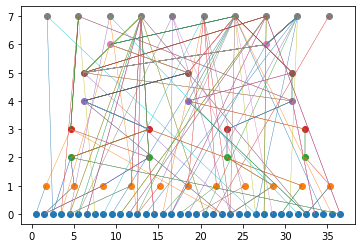

In [10]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [11]:
test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
test_y = digits.target[1617:]

In [12]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = test_y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = test_X[digits_indexes].shape[0]
test_x_inputs =[tuple(c) for c in test_X[digits_indexes].tolist()]
test_x_outputs = [tuple(c) for c in test_y[digits_indexes].reshape(samplesize,1).tolist()]

In [13]:
outputs = []
for xi in test_x_inputs:
    output = winner_net.activate(xi)
    outputs.append(output)


px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
# the index of maximum in each line
test_pred_outputs = np.argmax(px_outputs, axis = 1)
# replace index to real number, from higher number to lower number!!
for i in range(number_of_classification):
    index = number_of_classification - i - 1
    test_pred_outputs[test_pred_outputs==index] = numbers[index]

test_real_outputs = np.array(test_x_outputs).reshape(samplesize,)

In [14]:
test_real_outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9])

In [15]:
test_pred_outputs

array([4, 4, 7, 6, 4, 6, 6, 4, 6, 4, 6, 4, 4, 4, 6, 4, 2, 2, 2, 2, 2, 2,
       7, 7, 2, 2, 7, 2, 2, 4, 7, 7, 2, 7, 7, 6, 2, 6, 2, 2, 2, 2, 2, 2,
       2, 2, 6, 2, 2, 2, 2, 6, 7, 7, 7, 7, 2, 6, 2, 2, 7, 7, 7, 6, 7, 7,
       9, 9, 2, 9, 7, 4, 4, 4, 4, 7, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 2, 2, 2, 4, 2, 4, 6, 4, 4, 7, 7, 6, 4, 4, 6, 6, 6, 6, 6, 6,
       6, 2, 2, 4, 6, 4, 4, 6, 4, 6, 4, 4, 6, 6, 6, 6, 4, 4, 9, 4, 4, 4,
       7, 7, 7, 7, 7, 7, 7, 4, 4, 7, 7, 7, 4, 9, 7, 9, 7, 9, 2, 2, 9, 9,
       7, 9, 2, 2, 7, 7, 2, 9, 7, 9, 7, 7, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9], dtype=int64)

In [16]:
np.sum(test_pred_outputs == test_real_outputs)/samplesize

0.35555555555555557

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_pred_outputs, test_real_outputs)
print(cm)

[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0 11 13  4  1  4  2  0  5  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 9  1  0  0 17  6  6  8  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 6  0  4  2  0  6 10  0  0  0]
 [ 1  7  0  9  2  2  0 10  5  4]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  1  7 14]]


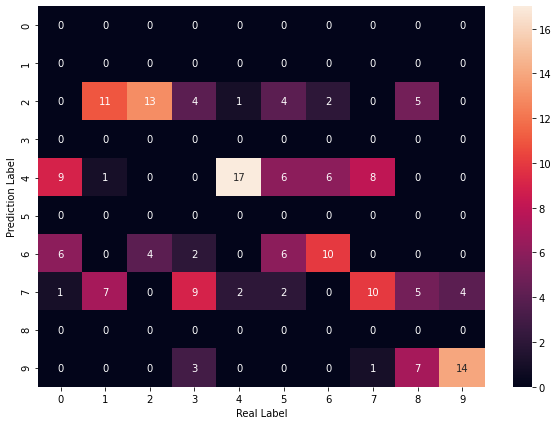

In [18]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [20]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [21]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [37, 11, 4, 4, 3, 3, 2, 10]


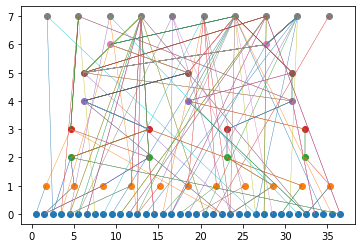

In [22]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [23]:
stats

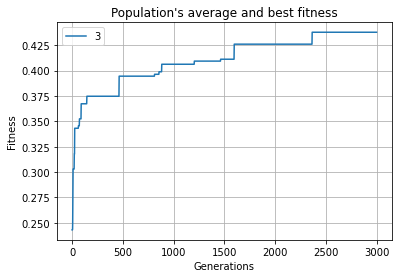

In [24]:

statistics = stats

generation = range(len(statistics.most_fit_genomes))
best_fitness = [c.fitness for c in statistics.most_fit_genomes]
avg_fitness = np.array(statistics.get_fitness_mean())
stdev_fitness = np.array(statistics.get_fitness_stdev())



#plt.plot(generation, avg_fitness, "b-", label="average")
#plt.plot(generation, avg_fitness - stdev_fitness, "g-.", label="-1 sd")
#plt.plot(generation, avg_fitness + stdev_fitness, "g-.", label="+1 sd")

plt.plot(generation, best_fitness, label=i)

plt.title("Population's average and best fitness")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.grid()
plt.legend(loc="best")
plt.show()

In [25]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(10)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []


used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)


# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1
list_nodes_number.append(np.sum(length_of_each_layer))
list_connection_number.append(len(all_path_side2side))
total_nodes = np.sum(list_nodes_number)
total_connections = np.sum(list_connection_number)
print("Total nodes:{} Total connections::{}".format(total_nodes, total_connections))


length of each layers: [37, 11, 4, 4, 3, 3, 2, 10]
Total nodes:74 Total connections::228
